In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_excel('../Godzilla.xlsx')

# Convert release date to datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Extract the release year
df['Release Year'] = df['Release Date'].dt.year

# Convert the 'Movie Budget (Yen)' and 'Final Revenue (Yen)' columns to numeric values, removing any non-numeric characters
df['Movie Budget (Yen)'] = df['Movie Budget (Yen)'].replace('[\¥,\,]', '', regex=True).replace('-', np.nan).astype(float)
df['Final Revenue (Yen)'] = df['Final Revenue (Yen)'].replace('[\¥,\,]', '', regex=True).replace('-', np.nan).astype(float)


# Convert Yen to USD (1 USD = 140 JPY)
conversion_rate = 140
df['Movie Budget (USD)'] = df['Movie Budget (Yen)'] / conversion_rate
df['Final Revenue (USD)'] = df['Final Revenue (Yen)'] / conversion_rate

# Drop the Yen columns as we are using the USD columns for modeling
df = df.drop(columns=['Movie Budget (Yen)', 'Final Revenue (Yen)'])


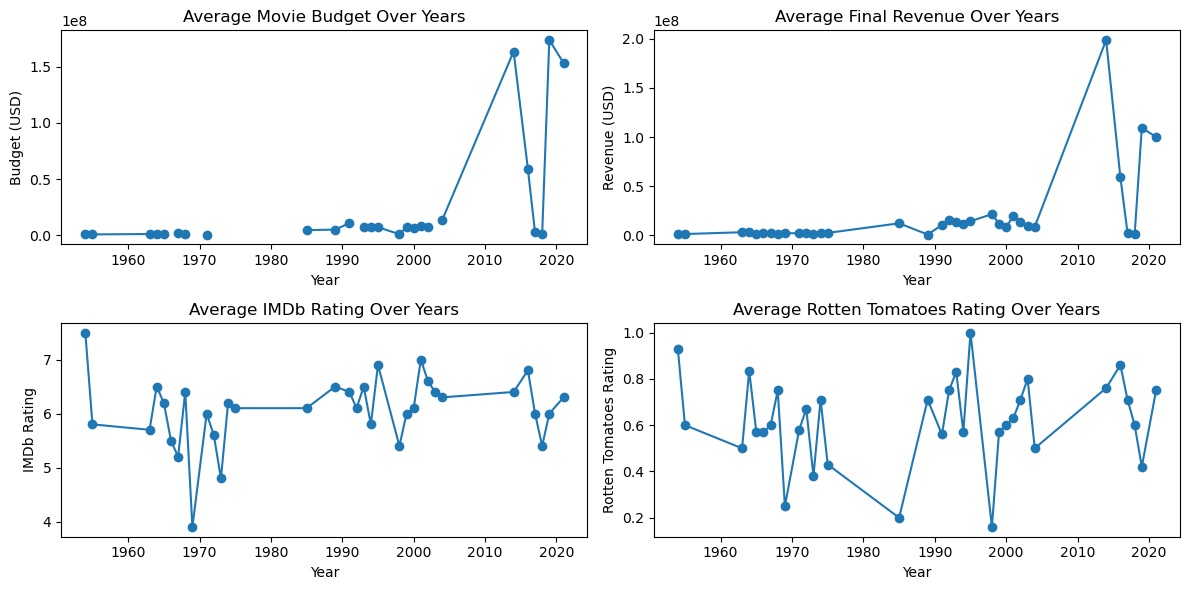

In [12]:
# Aggregate data by release year
yearly_data = df.groupby('Release Year').agg({
    'Movie Budget (USD)': 'mean',
    'Final Revenue (USD)': 'mean',
    'IMDb Rating': 'mean',
    'Rotten Tomatoes Rating': 'mean'
}).reset_index()

# Plot trends
plt.figure(figsize=(12, 6))

# Budget trend
plt.subplot(2, 2, 1)
plt.plot(yearly_data['Release Year'], yearly_data['Movie Budget (USD)'], marker='o')
plt.title('Average Movie Budget Over Years')
plt.xlabel('Year')
plt.ylabel('Budget (USD)')

# Revenue trend
plt.subplot(2, 2, 2)
plt.plot(yearly_data['Release Year'], yearly_data['Final Revenue (USD)'], marker='o')
plt.title('Average Final Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')

# IMDb rating trend
plt.subplot(2, 2, 3)
plt.plot(yearly_data['Release Year'], yearly_data['IMDb Rating'], marker='o')
plt.title('Average IMDb Rating Over Years')
plt.xlabel('Year')
plt.ylabel('IMDb Rating')

# Rotten Tomatoes rating trend
plt.subplot(2, 2, 4)
plt.plot(yearly_data['Release Year'], yearly_data['Rotten Tomatoes Rating'], marker='o')
plt.title('Average Rotten Tomatoes Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Rotten Tomatoes Rating')

plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for Prophet
prophet_data = df[['Release Date', 'Final Revenue (USD)']]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the model
model = Prophet()
model.fit(prophet_data)

# Make future predictions
future_dates = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
model.plot(forecast)
plt.title('Forecasting Final Revenue')
plt.xlabel('Year')
plt.ylabel('Revenue (USD)')
plt.show()